<a href="https://colab.research.google.com/github/Belajargihh/Machine_Learning/blob/main/prediksi_red_white_Perbandingan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 2. Load dan gabungkan data
df_red = pd.read_csv('/content/redwine.csv')
df_white = pd.read_csv('/content/whitewine.csv')

In [4]:
df_red['type'] = 'red'
df_white['type'] = 'white'
df = pd.concat([df_red, df_white], ignore_index=True)

In [5]:
# 3. One-hot encoding kolom 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [6]:
# 4. Pisahkan fitur dan target
X = df.drop('quality', axis=1)
y = df['quality']

In [7]:
# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42
)

In [8]:
# 6. Inisialisasi model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

In [9]:
# 7. Evaluasi model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

In [10]:
# 8. Tampilkan hasil evaluasi
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2', ascending=False))

           Model       MAE      RMSE        R2
1        XGBoost  0.089018  0.170725  0.950979
0  Random Forest  0.161729  0.249066  0.895667


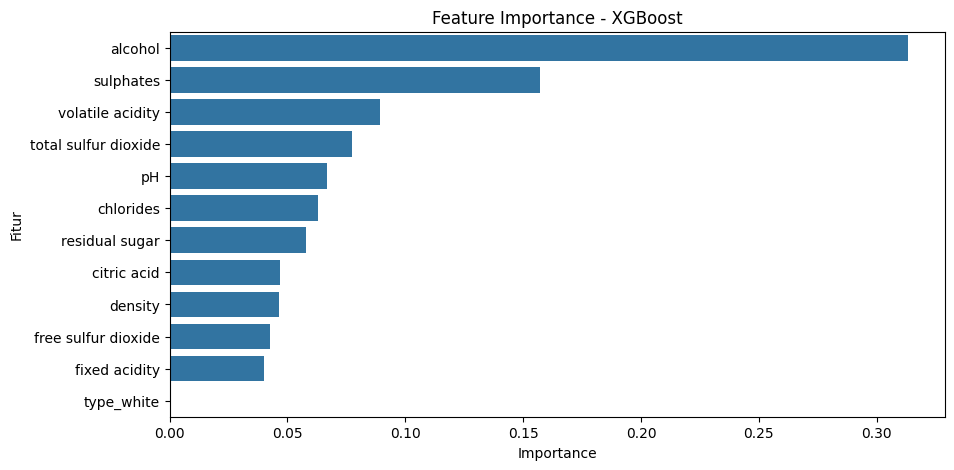

In [11]:
# Setelah hasil evaluasi
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Fitur': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Fitur', data=importance_df)
plt.title(f'Feature Importance - {name}')
plt.show()


/tmp/ipython-input-12-2394013415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df.sort_values(by='R2', ascending=True), palette='viridis')


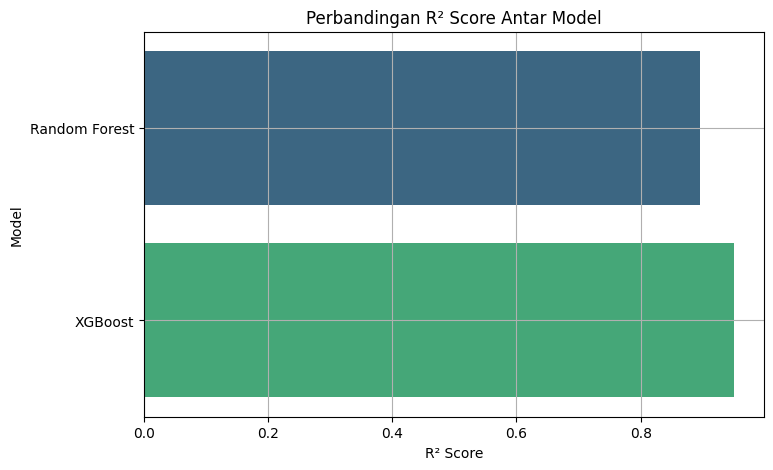

In [12]:
# 9. Visualisasi R2 per model
plt.figure(figsize=(8, 5))
sns.barplot(x='R2', y='Model', data=results_df.sort_values(by='R2', ascending=True), palette='viridis')
plt.title('Perbandingan R² Score Antar Model')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.grid(True)
plt.show()

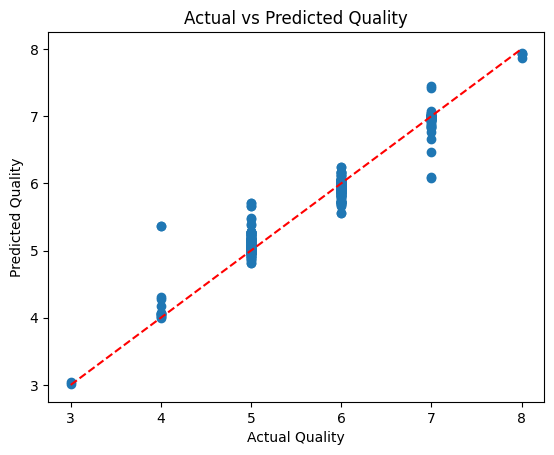

In [13]:
plt.scatter(y_test, y_pred) #Akurasi umum model secara visual
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis y = x
plt.show()


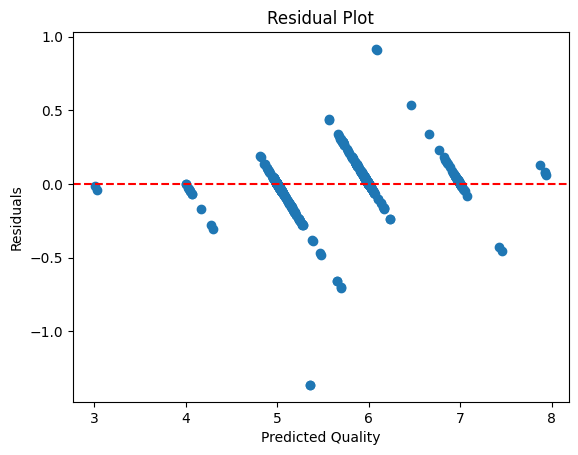

In [14]:
residuals = y_test - y_pred #	Melihat error dan bias model
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


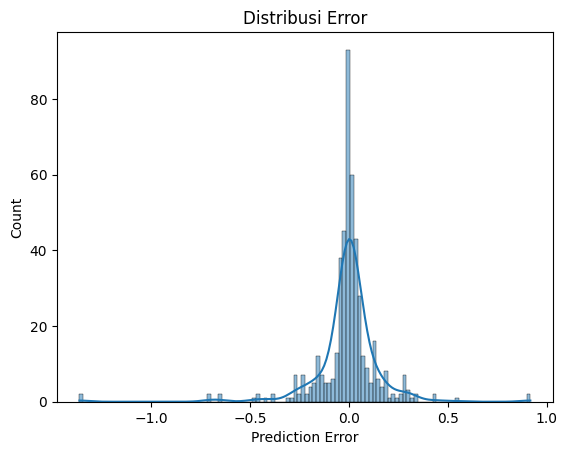

In [15]:
errors = y_test - y_pred #	Distribusi dan bentuk kesalahan prediksi
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Error")
plt.title("Distribusi Error")
plt.show()
